In [ ]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt 
from dotenv import load_dotenv
from os import environ
from tools import *

load_dotenv()

In [ ]:
g = Github(environ['user'],environ['token'])

### Scraping DL libraries

The focus of this project is to target libraries using Tensorflow, Keras or PyTorch (along with potential other options). So, we specify a filter on the repository search option.

In [ ]:
pytorch_repos = g.repo_search('pytorch+language:python+created:2019',{'page':1,'per_page':100}).json()

We find there are over 10000 items in the year of 2019. For reference, most of the deep learning libraries were established during 2015-2016 with PyTorch being made later, so querying is only really useful from
2017 onwards.

In [ ]:
pytorch_repos

Consult the Week 3 notebook for information on reading repository search information.

In [ ]:
len(pytorch_repos['items'])

100

## Commit Searching

We can request a list of commits for each repository. Pagination retrieves 100 commits in one call, and gives some basic information. However, to retrieve the patch information, you will need to request the commit link manually.

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

We can then generate a word cloud of all the commit messages. One thing to note is that a lot of them just have pull request or merge pull as they are being merged from some branch.

In [ ]:
commits = flatten([g.get_commits('mozilla/DeepSpeech',{'page':x+1,'per_page':100}).json() for x in range(35)])

In [ ]:
corpus = " ".join(comm['commit']['message'] for comm in commits)
wc = WordCloud(background_color='white',max_font_size=50, width = 1200, height = 400).generate(corpus)


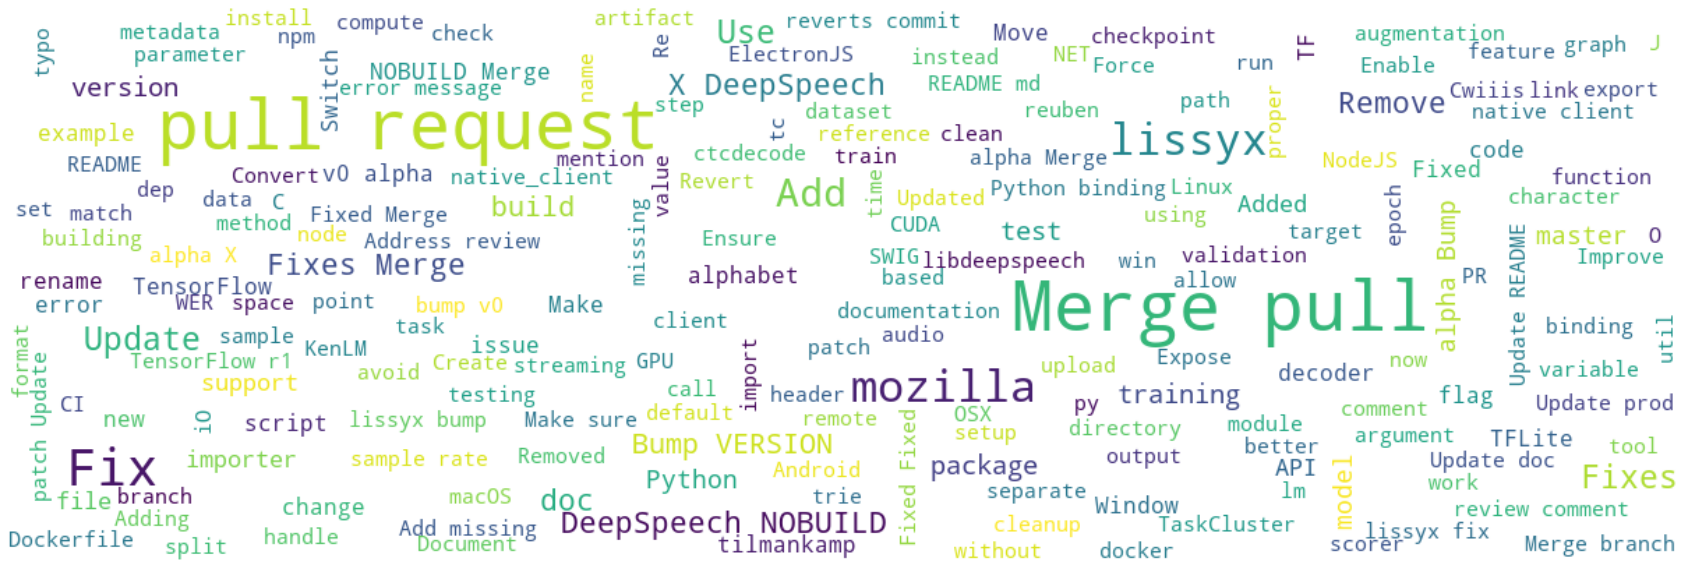

In [ ]:
fig = plt.figure(figsize=(30,30))
fig = plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()